In [ ]:
from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#import statsmodels.api as sample_data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

from IPython.core.display import display, HTML
from IPython.display import clear_output
display(HTML("<style>.container { width:90% }</style>"))
import warnings
warnings.filterwarnings('ignore')
# ------------------------------------------------------------------

import tensorflow as tf
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

C:\Users\PC Loaner A\AppData\Local\Temp\ipykernel_1540\3610838821.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# Load File and Check for Nulls

In [2]:
# The uploaded file will have the same name as the one you uploaded
data_path = 'BAN6025Project2Data.csv'
df = pd.read_csv(data_path)

# Preview data
df.info()
print(df.head())

# total count of NaN values
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Target_Y  1000000 non-null  int64  
 1   X1        1000000 non-null  float64
 2   X2        1000000 non-null  float64
 3   X3        1000000 non-null  int64  
 4   X4        1000000 non-null  int64  
 5   X5        1000000 non-null  int64  
 6   X6        1000000 non-null  float64
 7   X7        1000000 non-null  float64
 8   X8        1000000 non-null  object 
 9   X9        1000000 non-null  int64  
 10  X10       1000000 non-null  float64
 11  X11       1000000 non-null  float64
 12  X12       1000000 non-null  float64
 13  X13       1000000 non-null  int64  
 14  X14       1000000 non-null  int64  
 15  X15       1000000 non-null  object 
 16  X16       1000000 non-null  int64  
 17  X17       1000000 non-null  int64  
 18  X18       1000000 non-null  object 
 19  X19       1000000 non-

# Pre Processing

In [3]:
# Make X25 into 0,1 because it only has 2 values
df['X25'] = df['X25'].replace({'INTERNET': 0, 'TELEAPP': 1}).astype(int)

# Make into categories: Target_Y, X17, X19, X20, X22, X24, X25, X28
df['Target_Y'] = df['Target_Y'].astype('category')
'''
df['X17'] = df['X17'].astype('category')
df['X19'] = df['X19'].astype('category')
df['X20'] = df['X20'].astype('category')
df['X22'] = df['X22'].astype('category')
df['X24'] = df['X24'].astype('category')
df['X25'] = df['X25'].astype('category')
df['X28'] = df['X28'].astype('category')
'''
# Drop col X30 because it only has 0's
df = df.drop(['X30'], axis=1)


# Split into Train and Test + Balance Data with SMOTE

In [4]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Make into dummies: X8, X15, X18, X27 - (they are not numbers)
X = df.drop(['Target_Y'], axis=1)
X = pd.get_dummies(X, columns=['X8', 'X15', 'X18', 'X27', 'X1', 'X5', 'X14', 'X21', 'X23', 'X29', 'X31'], drop_first=True, dtype='float')


y = df['Target_Y']

# Oversampling using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=261)
X, y = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest

In [ ]:
# create an instance of a random forest classifier using default values
rf = RandomForestClassifier( n_estimators=100, max_depth=25, min_samples_split=20, min_samples_leaf=5, max_features=6, class_weight='balanced_subsample', n_jobs=-1, random_state=42 )

# fit the model to the training data
rf.fit(X_train, y_train)

# make predictions on the training and test data
y_pred_train_rf = rf.predict(X_train)
y_pred_test_rf = rf.predict(X_test)

y_prob_train_rf = rf.predict_proba(X_train)
y_prob_test_rf = rf.predict_proba(X_test)

# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_rf)
prec_train = precision_score(y_train, y_pred_train_rf)
rec_train = recall_score(y_train, y_pred_train_rf)
f1_train = f1_score(y_train, y_pred_train_rf)


# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1 Score.  : {:.4f}".format(f1_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_rf)
prec_test = precision_score(y_test, y_pred_test_rf)
rec_test = recall_score(y_test, y_pred_test_rf)
f1_test = f1_score(y_test, y_pred_test_rf)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1 Score.  : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9941
Precision: 0.9985
Recall.  : 0.9897
F1 Score.  : 0.9941

 -- test set -- 
Accuracy : 0.9939
Precision: 0.9983
Recall.  : 0.9895
F1 Score.  : 0.9939


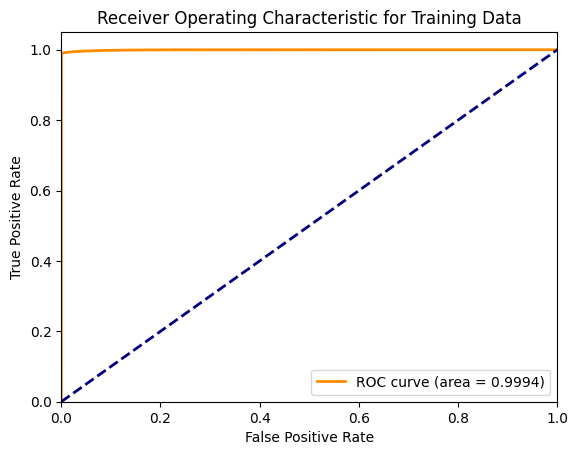

In [9]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_rf[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_rf[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

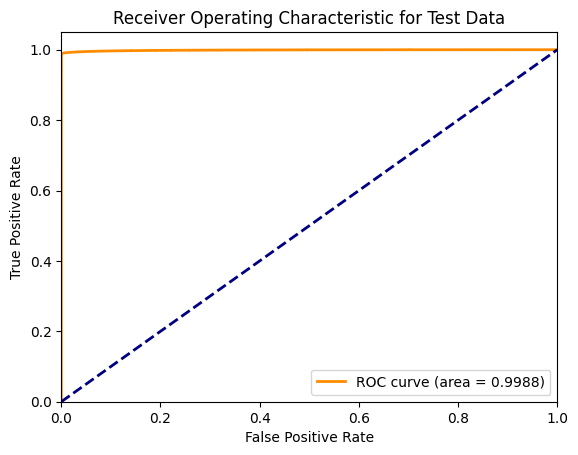

In [10]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_rf[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_rf[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


# Gradient Boosting

In [5]:
# create an instance of the Gradient Boosting Classifier using default values
gb = GradientBoostingClassifier(n_estimators = 150, learning_rate = 0.15000000000000002, max_depth=9,min_samples_split=20, min_samples_leaf=15,subsample=1.0, max_features='sqrt', random_state=904)

# fit the model to the training data
gb.fit(X_train, y_train)

# make predictions on the training and test data
y_pred_train_gb = gb.predict(X_train)
y_pred_test_gb = gb.predict(X_test)

y_prob_train_gb = gb.predict_proba(X_train)
y_prob_test_gb = gb.predict_proba(X_test)

# calculate the accuracy, precision, and recall scores
acc_train = accuracy_score(y_train, y_pred_train_gb)
prec_train = precision_score(y_train, y_pred_train_gb)
rec_train = recall_score(y_train, y_pred_train_gb)
f1_train = f1_score(y_train, y_pred_train_gb)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc_train))
print("Precision: {:.4f}".format(prec_train))
print("Recall.  : {:.4f}".format(rec_train))
print("F1 Score.  : {:.4f}".format(f1_train))
print("")

# calculate the accuracy, precision, and recall scores
acc_test = accuracy_score(y_test, y_pred_test_gb)
prec_test = precision_score(y_test, y_pred_test_gb)
rec_test = recall_score(y_test, y_pred_test_gb)
f1_test = f1_score(y_test, y_pred_test_gb)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc_test))
print("Precision: {:.4f}".format(prec_test))
print("Recall.  : {:.4f}".format(rec_test))
print("F1 Score.  : {:.4f}".format(f1_test))

 -- train set -- 
Accuracy : 0.9949
Precision: 0.9996
Recall.  : 0.9902
F1 Score.  : 0.9949

 -- test set -- 
Accuracy : 0.9943
Precision: 0.9990
Recall.  : 0.9896
F1 Score.  : 0.9943


In [6]:
# confusion matrix
conf_matrix = confusion_matrix(y_pred_train_gb, y_train)
print(conf_matrix)

# Generate confusion matrix for test set
conf_matrix = confusion_matrix(y_pred_test_gb, y_test)
print(conf_matrix)

[[691734   6763]
 [   276 685786]]
[[296680   3085]
 [   281 293337]]


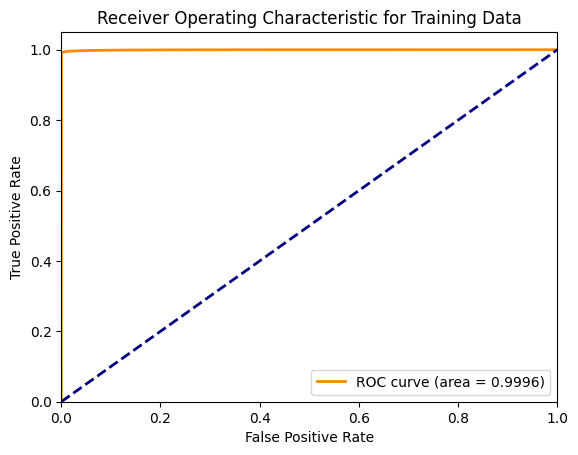

In [7]:
# Generate ROC curve for training data

fpr, tpr, thresholds = roc_curve(y_train.cat.codes, y_prob_train_gb[:,1])
roc_auc = roc_auc_score(y_train.cat.codes, y_prob_train_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Training Data')
plt.legend(loc='lower right')
plt.show()

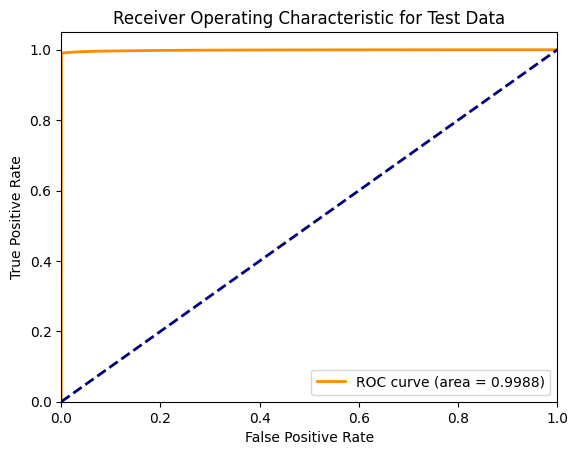

In [8]:
# Generate ROC curve for test data
fpr, tpr, thresholds = roc_curve(y_test.cat.codes, y_prob_test_gb[:,1])
roc_auc = roc_auc_score(y_test.cat.codes, y_prob_test_gb[:,1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Test Data')
plt.legend(loc='lower right')
plt.show()


    importance      feature
37    0.164972  X27_windows
2     0.060026           X4
18    0.059431          X28
46    0.055929       X1_0.9
36    0.050762    X27_other
29    0.049820       X18_BB
48    0.046725        X5_30
20    0.045626        X8_AC
30    0.044306       X18_BC
12    0.041616          X19


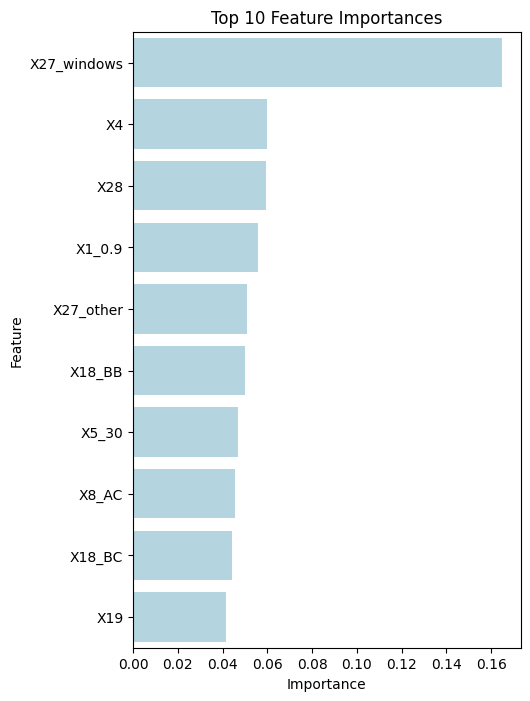

In [10]:
# Calculate feature importance
gb_imp = gb.feature_importances_

# Create a dataframe with feature names
df = pd.DataFrame({
    'importance': gb_imp,
    'feature': X.columns
})

# Sort data so features with largest importance values are at the top
df2 = df.sort_values(by='importance', ascending=False)

# Select only the top 10 features
df_top10 = df2.head(10)

# Print the top 10 features
print(df_top10)

# Create variable importance plot for top 10 features
plt.figure(figsize=(5, 8))
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df_top10, y='feature', x='importance', color="lightblue")
plt.show()


# Calculate Optimum Threshold
Profit = (TP* gain per TP) – (FN * cost per FN) – (FP * cost per FP)


In [17]:
#print out the fpr, tpr, and threshold values
roc_df = pd.DataFrame(zip(fpr, tpr, thresholds), columns = ['FPR', 'TPR', 'Threshold'])
print(roc_df)

# Define costs and benefits
gain_per_TP = 50000       # Gain per true positive
cost_per_FN = 250000      # Cost per false negative
cost_per_FP = 2500        # Cost per false positive

# Total number of positive and negative cases in the test set
total_positives = sum(y_test.cat.codes)  # Number of actual fraud cases
total_negatives = len(y_test) - total_positives  # Number of non-fraud cases

# Calculate TP, FP, FN based on TPR and FPR from ROC
roc_df['TP'] = roc_df['TPR'] * total_positives
roc_df['FP'] = roc_df['FPR'] * total_negatives
roc_df['FN'] = total_positives - roc_df['TP']

# Apply profit formula
roc_df['Profit'] = (roc_df['TP'] * gain_per_TP) - (roc_df['FN'] * cost_per_FN) - (roc_df['FP'] * cost_per_FP)

# Sort by Profit to find the optimal threshold
roc_df_sorted = roc_df.sort_values(by='Profit', ascending=False)

# Display top thresholds with highest profit
roc_df_sorted.head(10)

            FPR       TPR  Threshold
0      0.000000  0.000000        inf
1      0.000000  0.000003   1.000000
2      0.000000  0.000037   0.999999
3      0.000000  0.000047   0.999999
4      0.000000  0.000081   0.999999
...         ...       ...        ...
89558  0.972640  0.999993   0.000282
89559  0.972640  0.999997   0.000282
89560  0.983813  0.999997   0.000228
89561  0.983813  1.000000   0.000228
89562  1.000000  1.000000   0.000020

[89563 rows x 3 columns]


,FPR,TPR,Threshold,TP,FP,FN,Profit
88649,0.245712,0.998462,0.007134,295966.0,72967.0,456.0,1.450188e+10
88705,0.257179,0.998556,0.006721,295994.0,76372.0,428.0,1.450177e+10
88651,0.246409,0.998465,0.007107,295967.0,73174.0,455.0,1.450166e+10
88647,0.245662,0.998458,0.007136,295965.0,72952.0,457.0,1.450162e+10
88648,0.245712,0.998458,0.007134,295965.0,72967.0,457.0,1.450158e+10
88713,0.259081,0.998570,0.006651,295998.0,76937.0,424.0,1.450156e+10
88703,0.257135,0.998553,0.006723,295993.0,76359.0,429.0,1.450150e+10
88704,0.257179,0.998553,0.006722,295993.0,76372.0,429.0,1.450147e+10
88653,0.247103,0.998468,0.007081,295968.0,73380.0,454.0,1.450145e+10
88717,0.260064,0.998576,0.006621,296000.0,77229.0,422.0,1.450143e+10
